<font color='orange'><h2 align="center">Taller 3: análisis de redes sociales. - TERCERA PARTE</h2></font>

In [227]:
##Download scikit-learn library. 

!pip install -U scikit-learn

In [228]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [229]:
stop_words = set(stopwords.words('spanish'))

In [230]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

<h4 align="left"> Loading labeled tweets. </h4> 

In [231]:
    # Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets4.csv', sep = ',')

In [232]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [233]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4638
0.0     751
1.0     647
Name: sentiment, dtype: int64

In [234]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.76839
0.0    0.12442
1.0    0.10719
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [235]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [236]:
tweets_labeled_df.shape

(1398, 2)

In [237]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [238]:
tweets_nolabeled_df.shape

(4638, 2)

<h4 align="left"> Splitting train and test datasets. </h4> 

In [239]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [240]:
X_train.shape

(1118,)

In [241]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.537567
1.0    0.462433
Name: sentiment, dtype: float64

In [242]:
X_test.shape

(280,)

In [243]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.535714
1.0    0.464286
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [244]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [245]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [246]:
X_bow = bow.fit_transform(X_train)

In [247]:
X_tfidf = tfidf.fit_transform(X_train)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [248]:
logistic_model = LogisticRegression(random_state = 2)

In [249]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [250]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

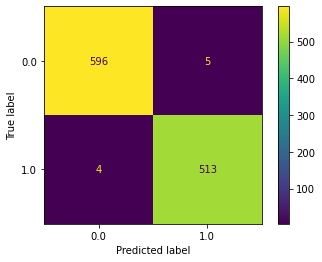

In [251]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

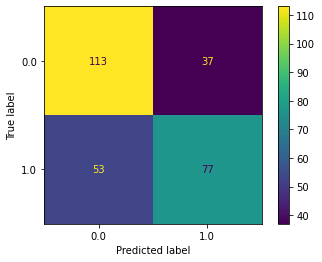

In [252]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [253]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6754385964912281
Recall: 0.5923076923076923
F1: 0.6311475409836065


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [254]:
logistic_model = LogisticRegression(random_state = 2)

In [255]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [256]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

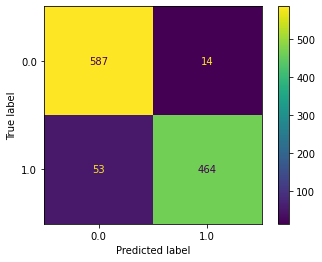

In [257]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

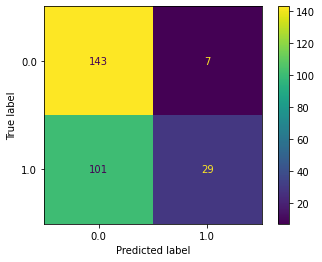

In [258]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [259]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.8055555555555556
Recall: 0.2230769230769231
F1: 0.3493975903614458


<font color='cian'><h3 align="left">Supervised machine learning using diferent models. </h3></font> 




<font color='red'><h4 align="left"> 1) Training using SVC. </h4></font> 

In [260]:
svm = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [261]:
X_svm = svm.fit_transform(X_train)

<h4 align="left"> ■ Kernel = poly.</h4> 

In [262]:
support_vector_machines = SVC(kernel = 'poly')

In [263]:
support_vector_machines.fit(X_svm, y_train)

SVC(kernel='poly')

In [264]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

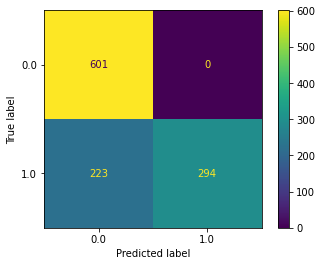

In [265]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)


<h4 align="left"> ■ Kernel = rbf.</h4> 



In [266]:
support_vector_machines = SVC(kernel = 'rbf')

In [267]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [268]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

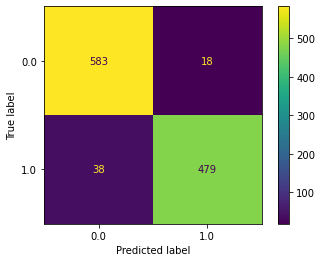

In [269]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

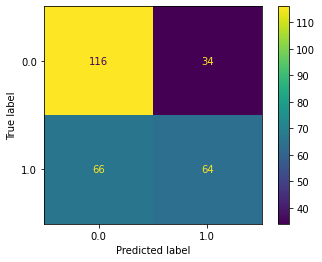

In [270]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

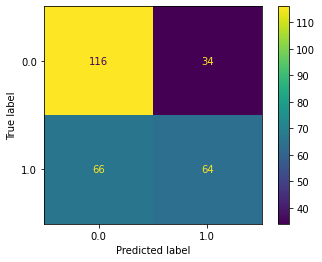

In [271]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

 <h4 align="left"> ■ Degree = 2.</h4> 
 

In [272]:
support_vector_machines = SVC(degree = 2)

In [273]:
support_vector_machines.fit(X_svm, y_train)

SVC(degree=2)

In [274]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

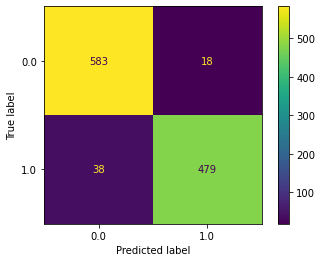

In [275]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

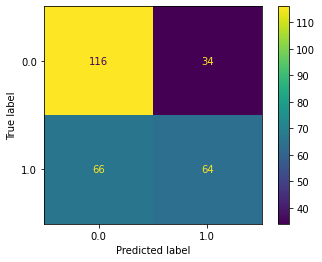

In [276]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [277]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.6530612244897959
Recall: 0.49230769230769234
F1: 0.5614035087719299


 <h4 align="left"> Degree = 3.</h4> 


In [278]:
support_vector_machines = SVC(degree = 3)

In [279]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [280]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

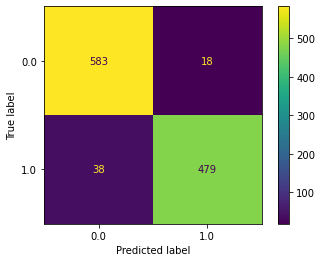

In [281]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

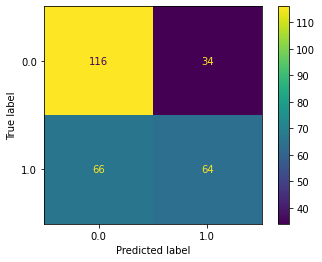

In [282]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [283]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.6530612244897959
Recall: 0.49230769230769234
F1: 0.5614035087719299


 <h4 align="left"> ■ Degree = 4.</h4> 


In [284]:
support_vector_machines = SVC(degree = 4)

In [285]:
support_vector_machines.fit(X_svm, y_train)

SVC(degree=4)

In [286]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

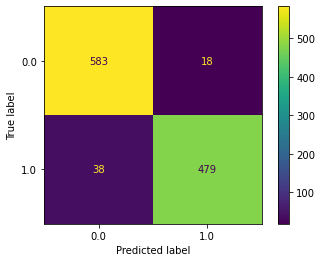

In [287]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

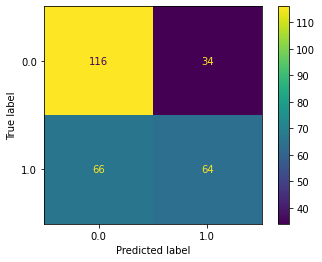

In [288]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [289]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.6530612244897959
Recall: 0.49230769230769234
F1: 0.5614035087719299


 <h4 align="left"> ■ Gamma = scale.</h4> 


In [290]:
support_vector_machines = SVC(gamma = 'scale')

In [291]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [292]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

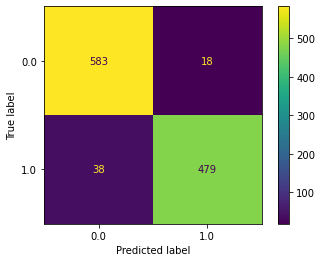

In [293]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

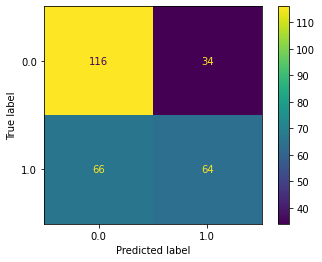

In [294]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [295]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.6530612244897959
Recall: 0.49230769230769234
F1: 0.5614035087719299


 <h4 align="left"> ■ Gamma = auto.</h4> 




In [296]:
support_vector_machines = SVC(gamma = 'auto')

In [297]:
support_vector_machines.fit(X_svm, y_train)

SVC(gamma='auto')

In [298]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

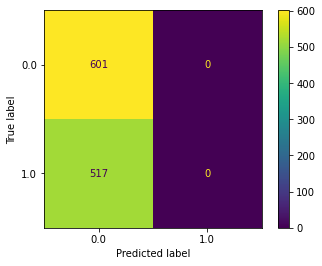

In [299]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

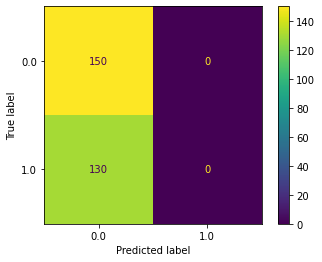

In [300]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [301]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


C:\Users\toshiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font color='red'><h4 align="left"> 2) Training using KNeighborsClassifier. </h4></font> 


 <h4 align="left">■ N_neighbors = 3.</h4> 



In [302]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [303]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [304]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=3)

In [305]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier(n_neighbors=3)

In [306]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

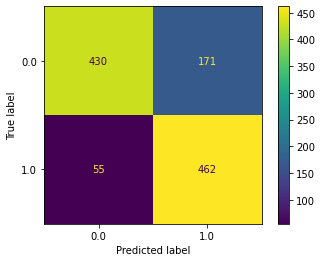

In [307]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

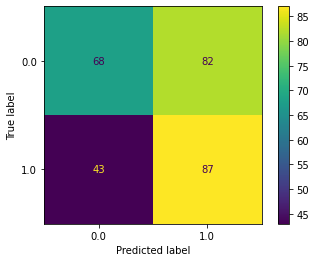

In [308]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [309]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.514792899408284
Recall: 0.6692307692307692
F1: 0.5819397993311036


 <h4 align="left"> ■ N_neighbors = 5.</h4> 



In [310]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [311]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [312]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=5)

In [313]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier()

In [314]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

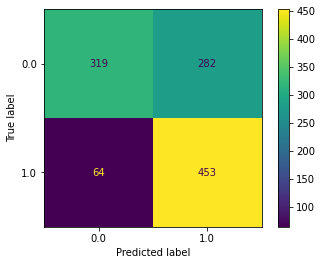

In [315]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

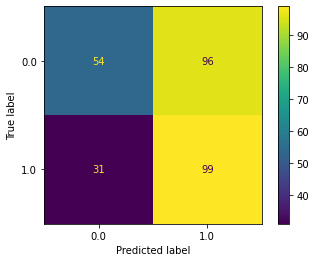

In [316]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [317]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.5076923076923077
Recall: 0.7615384615384615
F1: 0.6092307692307692


 <h4 align="left"> ■ N_neighbors = 7.</h4> 




In [318]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [319]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [320]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=7)

In [321]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier(n_neighbors=7)

In [322]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

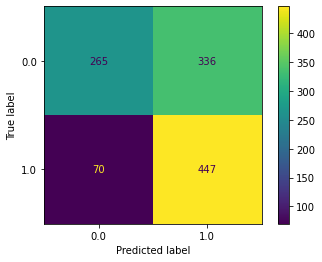

In [323]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

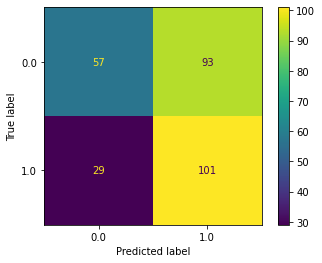

In [324]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [325]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.520618556701031
Recall: 0.7769230769230769
F1: 0.6234567901234569


<font color='red'><h4 align="left"> 3) Training using Multinomial Naive-Bayes. </h4></font> 




In [326]:
Naive_Bayes = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [327]:
X_Naive_Bayes = Naive_Bayes.fit_transform(X_train)

In [328]:
gnb = MultinomialNB()

In [329]:
gnb.fit(X_Naive_Bayes.toarray(), y_train)

MultinomialNB()

In [330]:
y_train_gnb_predict = gnb.predict(X_Naive_Bayes.toarray())

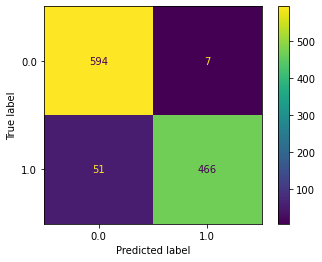

In [331]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gnb_predict)

In [332]:
print('Precision:', precision_score(y_train, y_train_gnb_predict))
print('Recall:', recall_score(y_train, y_train_gnb_predict))
print('F1:', f1_score(y_train, y_train_gnb_predict))

Precision: 0.985200845665962
Recall: 0.9013539651837524
F1: 0.9414141414141415



<font color='red'><h4 align="left"> 4) Training using DecisionTree. </h4></font>



 <h4 align="left"> ■ Max_depth = 3.</h4> 


In [333]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [334]:
X_dt = dt.fit_transform(X_train)

In [335]:
DecisionTree = DecisionTreeClassifier(max_depth = 3)

In [336]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=3)

In [337]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

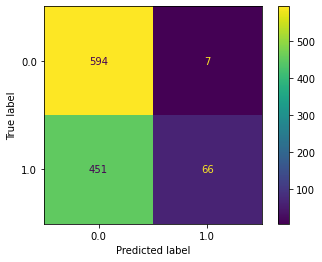

In [338]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

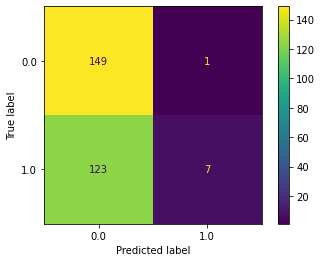

In [339]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [340]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.875
Recall: 0.05384615384615385
F1: 0.10144927536231883


 <h4 align="left"> ■ Max_depth = 6.</h4> 





In [341]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [342]:
X_dt = dt.fit_transform(X_train)

In [343]:
DecisionTree = DecisionTreeClassifier(max_depth = 6)

In [344]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=6)

In [345]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

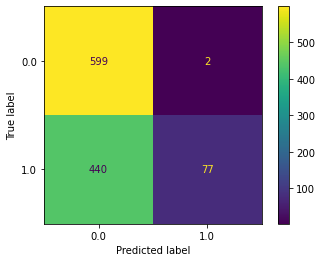

In [346]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

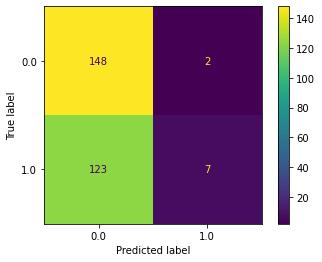

In [347]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [348]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.7777777777777778
Recall: 0.05384615384615385
F1: 0.10071942446043165



 <h4 align="left"> ■ Max_depth = 9.</h4> 




In [349]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [350]:
X_dt = dt.fit_transform(X_train)

In [351]:
DecisionTree = DecisionTreeClassifier(max_depth = 9)

In [352]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=9)

In [353]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

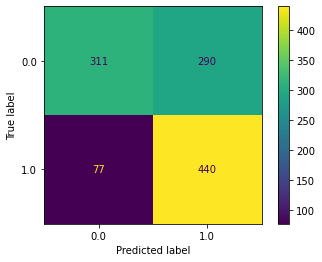

In [354]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

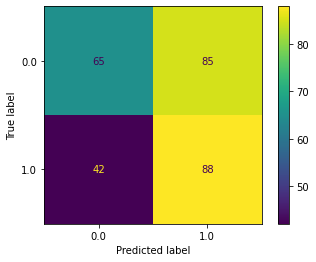

In [355]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [356]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.5086705202312138
Recall: 0.676923076923077
F1: 0.5808580858085809



<font color='red'><h4 align="left"> 5) Training using RandomForest. </h4></font>



 <h4 align="left"> ■ Max_depth = 3.</h4> 


In [357]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [358]:
X_rf = rf.fit_transform(X_train)

In [359]:
RandomForest = RandomForestClassifier(max_depth = 3)

In [360]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=3)

In [361]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

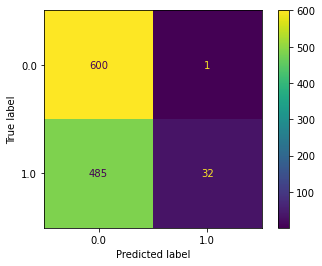

In [362]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

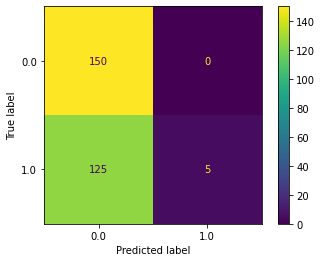

In [363]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [364]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.038461538461538464
F1: 0.07407407407407407


 <h4 align="left"> ■ Max_depth = 6.</h4> 



In [365]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [366]:
X_rf = rf.fit_transform(X_train)

In [367]:
RandomForest = RandomForestClassifier(max_depth = 6)

In [368]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=6)

In [369]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

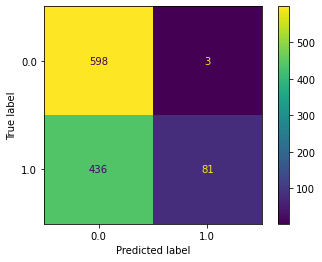

In [370]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

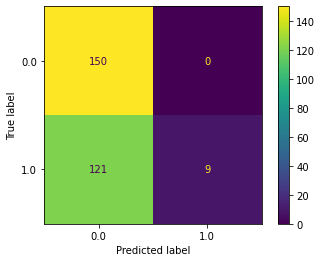

In [371]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [372]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.06923076923076923
F1: 0.12949640287769784


 <h4 align="left"> ■ Max_depth = 9.</h4> 


In [373]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [374]:
X_rf = rf.fit_transform(X_train)

In [375]:
RandomForest = RandomForestClassifier(max_depth = 9)

In [376]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=9)

In [377]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

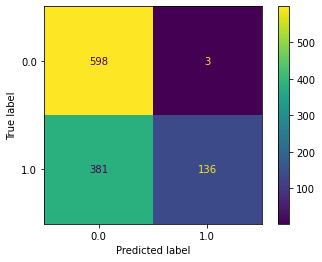

In [378]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

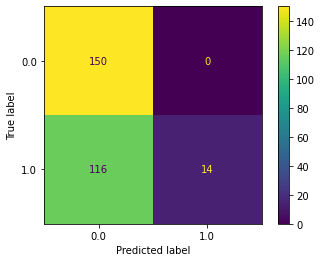

In [379]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [380]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.1076923076923077
F1: 0.19444444444444445


 <h4 align="left"> ■ N_estimators = 100.</h4> 




In [381]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [382]:
X_rf = rf.fit_transform(X_train)

In [383]:
RandomForest = RandomForestClassifier(n_estimators = 100)

In [384]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier()

In [385]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

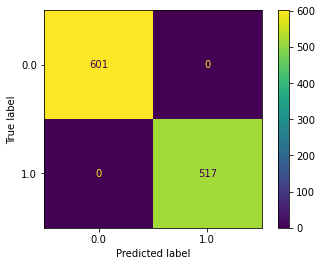

In [386]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

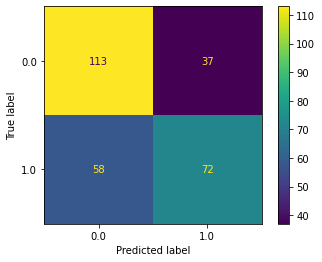

In [387]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [388]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.6605504587155964
Recall: 0.5538461538461539
F1: 0.602510460251046


 <h4 align="left"> ■ N_estimators = 200.</h4> 




In [389]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [390]:
X_rf = rf.fit_transform(X_train)

In [391]:
RandomForest = RandomForestClassifier(n_estimators = 200)

In [392]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(n_estimators=200)

In [393]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

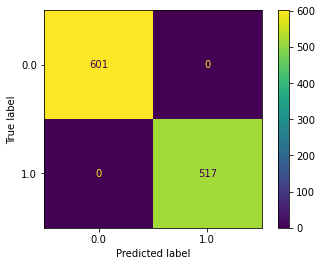

In [394]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

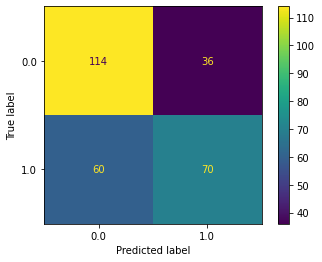

In [395]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [396]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.660377358490566
Recall: 0.5384615384615384
F1: 0.5932203389830508


 <h4 align="left"> ■ N_estimators = 300.</h4> 




In [397]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [398]:
X_rf = rf.fit_transform(X_train)

In [399]:
RandomForest = RandomForestClassifier(n_estimators = 300)

In [400]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(n_estimators=300)

In [401]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

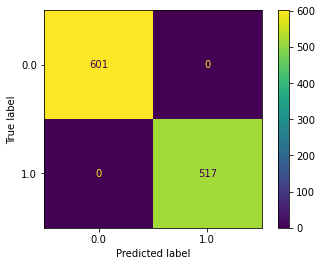

In [402]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

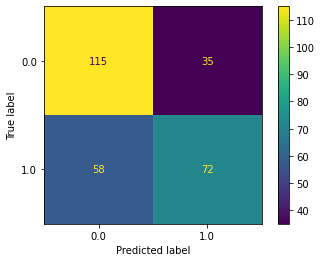

In [403]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [404]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.6728971962616822
Recall: 0.5538461538461539
F1: 0.6075949367088608


<font color='red'><h4 align="left"> 6) Training using Neuronal Network. </h4></font>



 <h4 align="left"> ■ Hidden_layer_sizes = (100).</h4> 




In [405]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [406]:
X_nn = nn.fit_transform(X_train)

In [407]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100))

In [408]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=100)

In [409]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

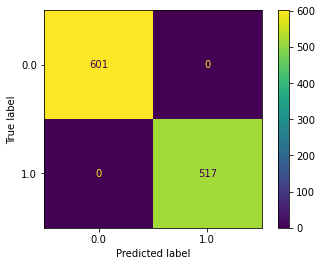

In [410]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

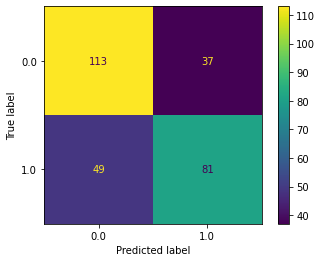

In [411]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [412]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6864406779661016
Recall: 0.6230769230769231
F1: 0.6532258064516129


 <h4 align="left"> ■ Hidden_layer_sizes = (100, 100).</h4> 




In [413]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [414]:
X_nn = nn.fit_transform(X_train)

In [415]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100, 100))

In [416]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

In [417]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

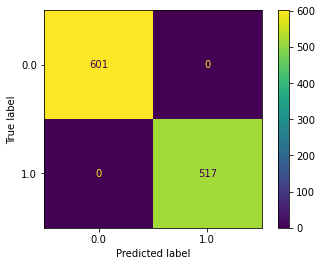

In [418]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

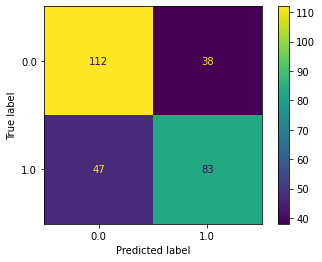

In [419]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [420]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6859504132231405
Recall: 0.6384615384615384
F1: 0.6613545816733067


 <h4 align="left"> ■ Hidden_layer_sizes = (100, 100, 100).</h4> 




In [421]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [422]:
X_nn = nn.fit_transform(X_train)

In [423]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100, 100, 100))

In [424]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [425]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

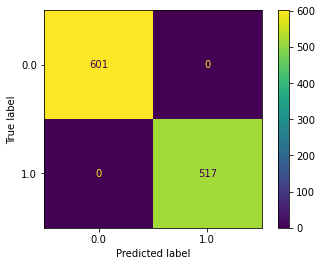

In [426]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

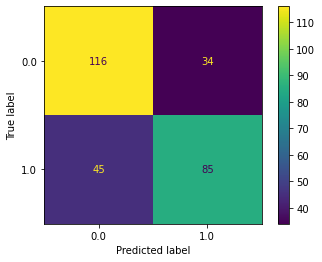

In [427]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [428]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.7142857142857143
Recall: 0.6538461538461539
F1: 0.6827309236947792


 <h4 align="left"> ■ Hidden_layer_sizes = (200).</h4> 




In [429]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [430]:
X_nn = nn.fit_transform(X_train)

In [431]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200))

In [432]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=200)

In [433]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

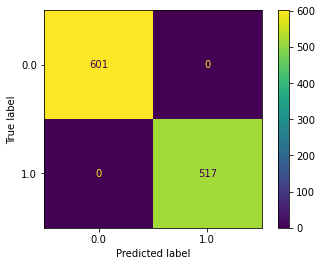

In [434]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

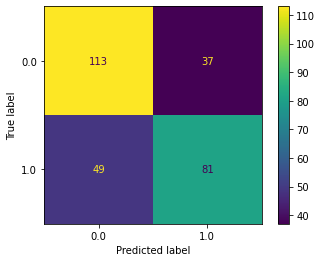

In [435]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [436]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6864406779661016
Recall: 0.6230769230769231
F1: 0.6532258064516129


 <h4 align="left"> ■ Hidden_layer_sizes = (200, 200).</h4> 




In [437]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [438]:
X_nn = nn.fit_transform(X_train)

In [439]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200, 200))

In [440]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200))

In [441]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

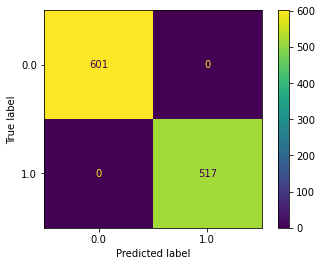

In [442]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

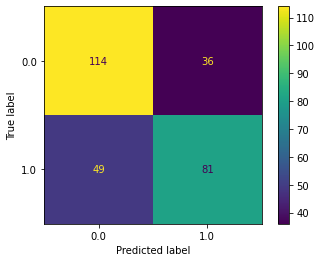

In [443]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [444]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6923076923076923
Recall: 0.6230769230769231
F1: 0.6558704453441295


 <h4 align="left"> ■ Hidden_layer_sizes = (200, 200, 200).</h4> 




In [445]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [446]:
X_nn = nn.fit_transform(X_train)

In [447]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200, 200, 200))

In [448]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [449]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

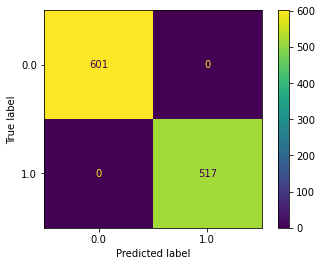

In [450]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

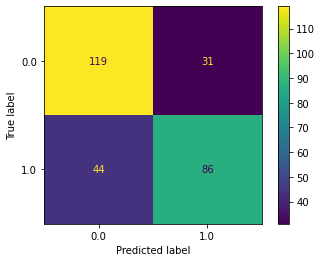

In [451]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [452]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.7350427350427351
Recall: 0.6615384615384615
F1: 0.6963562753036439
